## **Importação de Bibliotecas**

A biblioteca *warnings* será usada para filtrar as saídas de avisos, neste caso ignorando-as.

**Observações sobre a instalação das bibliotecas**

As bibliotecas aparentemente funcionam bem em SO *Linux* e MAC, mas utilizá-las em um SO *Windows* pode ser um verdadeiro tormento desde a sua instalação. Infelizmente, tive esse desprazer.

A instalação das bibliotecas geopandas e basedosdados é realizada perfeitamente no ambiente *Google Colab*, porém não é possível fazer a autenticação com a GCP pois, a conexão com localhost é sempre recusada.

Ao usar a IDLE *PyCharm* ou o *Jupyter Notebook* (seja pelo *Windows* CMD ou *Anaconda Navigator*) a instalação desses 2 pacotes sempre falha. A lib basedosdados exige a instalação do *Microsoft C++ Build Tools*, já o geopandas exige a instalação (manual) de diversas dependências (*wheels*) e muita paciência.

Eu apresento ao final desse notebook a melhor alternativa que encontrei para instalação do geopandas no *Windows* e alguns links úteis, mas se você for utilizar esses pacotes e puder escolher o SO use preferencialmente algum baseado no *kernel Linux* ou MAC OS.

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy             as np
import pandas            as pd
import basedosdados      as bd
import seaborn           as sns
import geopandas         as gpd
import matplotlib.pyplot as plt

## **Obtenção e Visualização do Dataset**

Acesso ao *datalake* Base dos Dados Mais e obtenção dos dados do Censo agropecuário do IBGE (1985 à 2017).

In [2]:
df = bd.read_table(
                   dataset_id='br_ibge_censo_agropecuario',
                   table_id='municipio',
                   billing_project_id="data-visualization-bdplus"
                  )

Downloading: 100%|████████████████████████████████████████████████████████████| 20738/20738 [00:28<00:00, 727.33rows/s]


Visualização os dados e informações básicas.

In [3]:
display(df)

,ano,sigla_uf,id_municipio,area_total,area_proprietario,area_arrendatario,area_parceiro,area_ocupante,area_lavoura_permanente,area_lavoura_temporaria,...,valor_total_cultura_permanente,valor_total_matas_plantadas,valor_total_predios_benfeitorias,valor_total_animais,valor_total_animais_transporte,valor_total_maquinas_transporte,proporcao_despesa_fertilizante,proporcao_despesa_defensivos,proporcao_despesa_sementes,proporcao_despesa_salarios
0,1985,RO,1100023,NaN,682505.25,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1985,RO,1100049,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1985,RO,1100056,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1985,RO,1100064,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1985,RO,1100080,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20733,2017,GO,5222005,79967.0,74387.00,5225.0,0.0,0.0,154.0,42274.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20734,2017,GO,5222054,62341.0,57153.00,2683.0,2213.0,0.0,1265.0,39136.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20735,2017,GO,5222203,84770.0,80518.00,0.0,0.0,0.0,16.0,6945.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20736,2017,GO,5222302,186118.0,174196.00,5665.0,0.0,6116.0,5337.0,49492.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Carregamento do dataset de intoxicação exógena do Ministério da Saúde via TabNET, DATASUS.

Link: http://tabnet.datasus.gov.br/cgi/deftohtm.exe?sinannet/cnv/Intoxbr.def

In [4]:
df_intoxic = pd.read_csv('A010523189_28_143_208.csv', sep=';', encoding='latin-1', skiprows=[0, 1, 2, 3])
display(df_intoxic)

,UF de notificação,Ign/Branco,Sim,Não,Total
0,11 Rondônia,4.0,62.0,72.0,138.0
1,12 Acre,1.0,10.0,9.0,20.0
2,16 Amapá,0.0,0.0,0.0,0.0
3,13 Amazonas,1.0,9.0,9.0,19.0
4,14 Roraima,4.0,5.0,7.0,16.0
5,15 Pará,6.0,22.0,64.0,92.0
6,17 Tocantins,1.0,63.0,42.0,106.0
7,21 Maranhão,3.0,9.0,15.0,27.0
8,22 Piauí,4.0,19.0,20.0,43.0
9,23 Ceará,12.0,23.0,97.0,132.0


## **Pré-processamento dos Dados**

### Data Selection

Seleção das *features* que serão utilizadas. Irei delimitar os dados para o Censo de 2017 específicamente. Não irei usar todas as features pois, pretendo focar na questão dos defensivos agrícolas.

In [5]:
df_agro = df[['ano', 'sigla_uf', 'despesa_defensivos', 'despesa_total', 'despesa_adubos',
              'despesa_sementes', 'despesa_arrendamentos', 'despesa_salarios', 'despesa_cotas', 
              'valor_producao_total', 'valor_total_producao_vegetal', 'valor_producao_total_animal']]

df_agro['ano'] = df_agro['ano'].astype(str)
df_agro = df_agro.loc[df_agro['ano'] >= '2017']
display(df_agro)

,ano,sigla_uf,despesa_defensivos,despesa_total,despesa_adubos,despesa_sementes,despesa_arrendamentos,despesa_salarios,despesa_cotas,valor_producao_total,valor_total_producao_vegetal,valor_producao_total_animal
15175,2017,RO,2582.0,8517.0,NaN,3317.0,10348.0,2886.0,46.0,54.0,0.0,697.0
15176,2017,RO,2303.0,5524.0,NaN,270.0,19806.0,2928.0,66.0,594.0,0.0,19.0
15177,2017,RO,961.0,14730.0,NaN,1995.0,9328.0,1075.0,92.0,9185.0,0.0,0.0
15178,2017,RO,3438.0,5264.0,NaN,3993.0,20526.0,3814.0,29.0,8.0,0.0,24.0
15179,2017,RO,671.0,23229.0,NaN,925.0,6334.0,719.0,15.0,2738.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
20733,2017,GO,799.0,21943.0,NaN,2955.0,33339.0,843.0,33.0,0.0,0.0,1192.0
20734,2017,GO,120.0,10339.0,NaN,5701.0,10547.0,158.0,22.0,11.0,0.0,1596.0
20735,2017,GO,74.0,27.0,NaN,2013.0,697.0,149.0,0.0,0.0,0.0,2.0
20736,2017,GO,629.0,13178.0,NaN,12511.0,11568.0,854.0,27.0,15.0,0.0,2.0


In [6]:
df_agro.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5563 entries, 15175 to 20737
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ano                           5563 non-null   object 
 1   sigla_uf                      5563 non-null   object 
 2   despesa_defensivos            5563 non-null   float64
 3   despesa_total                 5483 non-null   float64
 4   despesa_adubos                65 non-null     float64
 5   despesa_sementes              5488 non-null   float64
 6   despesa_arrendamentos         5563 non-null   float64
 7   despesa_salarios              5563 non-null   float64
 8   despesa_cotas                 5563 non-null   float64
 9   valor_producao_total          5555 non-null   float64
 10  valor_total_producao_vegetal  5555 non-null   float64
 11  valor_producao_total_animal   5555 non-null   float64
dtypes: float64(10), object(2)
memory usage: 565.0+ KB


In [7]:
df_agro.isnull().sum()

ano                                0
sigla_uf                           0
despesa_defensivos                 0
despesa_total                     80
despesa_adubos                  5498
despesa_sementes                  75
despesa_arrendamentos              0
despesa_salarios                   0
despesa_cotas                      0
valor_producao_total               8
valor_total_producao_vegetal       8
valor_producao_total_animal        8
dtype: int64

Apenas cerca de 1,17% (65) das observações da coluna "despesa_adubos" não estão vazias, por isso iremos removê-la.

In [8]:
df_agro.drop(columns=['despesa_adubos'], inplace=True)
df_agro.reset_index(inplace=True, drop=True)
display(df_agro)

,ano,sigla_uf,despesa_defensivos,despesa_total,despesa_sementes,despesa_arrendamentos,despesa_salarios,despesa_cotas,valor_producao_total,valor_total_producao_vegetal,valor_producao_total_animal
0,2017,RO,2582.0,8517.0,3317.0,10348.0,2886.0,46.0,54.0,0.0,697.0
1,2017,RO,2303.0,5524.0,270.0,19806.0,2928.0,66.0,594.0,0.0,19.0
2,2017,RO,961.0,14730.0,1995.0,9328.0,1075.0,92.0,9185.0,0.0,0.0
3,2017,RO,3438.0,5264.0,3993.0,20526.0,3814.0,29.0,8.0,0.0,24.0
4,2017,RO,671.0,23229.0,925.0,6334.0,719.0,15.0,2738.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
5558,2017,GO,799.0,21943.0,2955.0,33339.0,843.0,33.0,0.0,0.0,1192.0
5559,2017,GO,120.0,10339.0,5701.0,10547.0,158.0,22.0,11.0,0.0,1596.0
5560,2017,GO,74.0,27.0,2013.0,697.0,149.0,0.0,0.0,0.0,2.0
5561,2017,GO,629.0,13178.0,12511.0,11568.0,854.0,27.0,15.0,0.0,2.0


Aqui farei a alteração da feature referente ao nome por extenso da UF de notificação para as respectivas siglas das UFs. O dataset do DATASUS segue um padrão específico que pode atrapalhar nas etapas seguintes, por isso é melhor modificá-la.

In [9]:
estados = {
    '12 Acre': 'AC', '27 Alagoas': 'AL', '16 Amapá': 'AP',
    '13 Amazonas': 'AM', '29 Bahia': 'BA', '23 Ceará': 'CE',
    '53 Distrito Federal': 'DF', '32 Espírito Santo': 'ES',
    '52 Goiás': 'GO', '21 Maranhão': 'MA', '51 Mato Grosso': 'MT',
    '50 Mato Grosso do Sul': 'MS', '31 Minas Gerais': 'MG',
    '15 Pará': 'PA', '25 Paraíba': 'PB', '41 Paraná': 'PR',
    '26 Pernambuco': 'PE', '22 Piauí': 'PI', '33 Rio de Janeiro': 'RJ',
    '24 Rio Grande do Norte': 'RN', '43 Rio Grande do Sul': 'RS',
    '11 Rondônia': 'RO', '14 Roraima': 'RR', '42 Santa Catarina': 'SC',
    '35 São Paulo': 'SP', '28 Sergipe': 'SE', '17 Tocantins': 'TO',
}

Devido a formatação padrão dos conjutos do TabNET há uma série de linhas vázias ao final do dataset, por isso é preciso removê-las juntamente com a linha "total" (temos uma linha e uma feature com o mesmo nome e dados diferentes). 

In [10]:
df_intoxic = df_intoxic.rename(columns={'UF de notificação': 'sigla_uf', 
                                        'Sim': 'intoxic_trabalho', 
                                        'Não': 'intoxic_outros', 'Total': 'total_intoxic'})
df_intoxic.dropna(axis=0, inplace=True)
df_intoxic.drop(27, inplace=True)
df_intoxic.sigla_uf = df_intoxic.sigla_uf.apply(lambda x: estados[x])
df_intoxic.tail()

,sigla_uf,Ign/Branco,intoxic_trabalho,intoxic_outros,total_intoxic
22,RS,12.0,302.0,128.0,442.0
23,MS,6.0,43.0,36.0,85.0
24,MT,1.0,64.0,23.0,88.0
25,GO,25.0,119.0,150.0,294.0
26,DF,7.0,56.0,7.0,70.0


### **Tratamento de Valores Vazios (Missing Data)**

Identificação e tratamento de valores ausentes.

In [11]:
df_agro.isnull().sum()

ano                              0
sigla_uf                         0
despesa_defensivos               0
despesa_total                   80
despesa_sementes                75
despesa_arrendamentos            0
despesa_salarios                 0
despesa_cotas                    0
valor_producao_total             8
valor_total_producao_vegetal     8
valor_producao_total_animal      8
dtype: int64

Embora medidas centrais como média e mediana sejam alternativas simples e muito úteis para preencher dados ausentes, nem sempre elas geram bons resultados. Neste case, preencher a feature de despesas totais usando a mediana é uma solução inapropriada pois, obteremos alguns resultados absurdos como um valor total de despesas com defensivos maior do que a despesa total (somatório de todas as despesas), o que não faz sentido algum.

Por isso, optei por preencher esta coluna com a soma de todas as features de despesas. Apenas a feature de despesas com adubos foi removida por conter missing data em 98,83% das observações e por isso considero que essa exclusão não irá gerar um impacto negativo significativo nos resultados.

### **Função de Preenchimento de Missing Data**

**Sintaxe:** fill_missing_data(dataframe, features, columnsToSum, column)

Esta função aceita os argumentos a seguir.

**dataframe:** o dataframe do pandas que que terá os missing data tratados. 

**features:** lista de colunas do dataframe que contém missing data, os elementos devem ser do tipo string.

**columnsToSum:** lista de colunas do dataframe que serão somadas para preencher os missing data de uma feature especificada, os elementos devem ser do tipo string.

**column:** nome da feature que terá missing data preenchidos pelo somatório das features do argumento columnsToSum, deve ser do tipo string.

In [12]:
def fill_missing_data(dataframe, features, columnsToSum, column):

    for feature in features:
        median = dataframe[feature].median()
        dataframe[feature].fillna(median, inplace=True)
    
    dataframe[column] = dataframe[columnsToSum].astype(float).sum(axis=1)
    
    return dataframe

In [13]:
features = ['despesa_sementes', 'valor_producao_total', 'valor_total_producao_vegetal', 'valor_producao_total_animal']
features_soma = ['despesa_defensivos', 'despesa_sementes', 'despesa_arrendamentos', 'despesa_salarios', 'despesa_cotas']

df_agro = fill_missing_data(df_agro, features, features_soma, 'despesa_total')
df_agro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5563 entries, 0 to 5562
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ano                           5563 non-null   object 
 1   sigla_uf                      5563 non-null   object 
 2   despesa_defensivos            5563 non-null   float64
 3   despesa_total                 5563 non-null   float64
 4   despesa_sementes              5563 non-null   float64
 5   despesa_arrendamentos         5563 non-null   float64
 6   despesa_salarios              5563 non-null   float64
 7   despesa_cotas                 5563 non-null   float64
 8   valor_producao_total          5563 non-null   float64
 9   valor_total_producao_vegetal  5563 non-null   float64
 10  valor_producao_total_animal   5563 non-null   float64
dtypes: float64(9), object(2)
memory usage: 478.2+ KB


In [14]:
df_agro.isnull().any()

ano                             False
sigla_uf                        False
despesa_defensivos              False
despesa_total                   False
despesa_sementes                False
despesa_arrendamentos           False
despesa_salarios                False
despesa_cotas                   False
valor_producao_total            False
valor_total_producao_vegetal    False
valor_producao_total_animal     False
dtype: bool

### **Tratamento de Outliers**

Plotagem do *boxplot* dos dados para detecção de anomalias.

### **Função de Plotagem Múltipla de Boxplot**

**sintaxe:** multiple_boxplot(dataframe, columns, numPlots, title, fontsize, adjust)

Esta função aceita os argumentos a seguir.

**dataframe:** o dataframe do pandas com os dados a serem plotados. 

**columns:** lista de strings com os nomes das colunas com os dados a serem plotados.

**numPlots:** número de boxplots que serão gerados, deve ser um valor inteiro.

**title:** títulos dos gráficos. Deve ser uma lista de strings.

**fontsize:** valor inteiro como o tamanho da fonte dos títulos.

**adjust:** uma lista contendo 6(seis) valores inteiros que correspondem a formatação da figira. Obrigatoriamente devem vir na ordem: [left, right, bottom, top, hspace, wspace].

In [15]:
def multiple_boxplot(dataframe, columns, numPlots, title, fontsize, adjust):
    
    plt.style.use('ggplot')
    
    num = np.arange(0, numPlots, 1)
    fig, axs = plt.subplots(1, len(num))

    for n in num:
        axs[n].boxplot(dataframe[columns[n]], 0)
        axs[n].set_title(title[n], size=fontsize)
    
        fig.subplots_adjust(left=adjust[0], right=adjust[1], bottom=adjust[2],
                            top=adjust[3], hspace=adjust[4], wspace=adjust[5])
    
    plt.show();

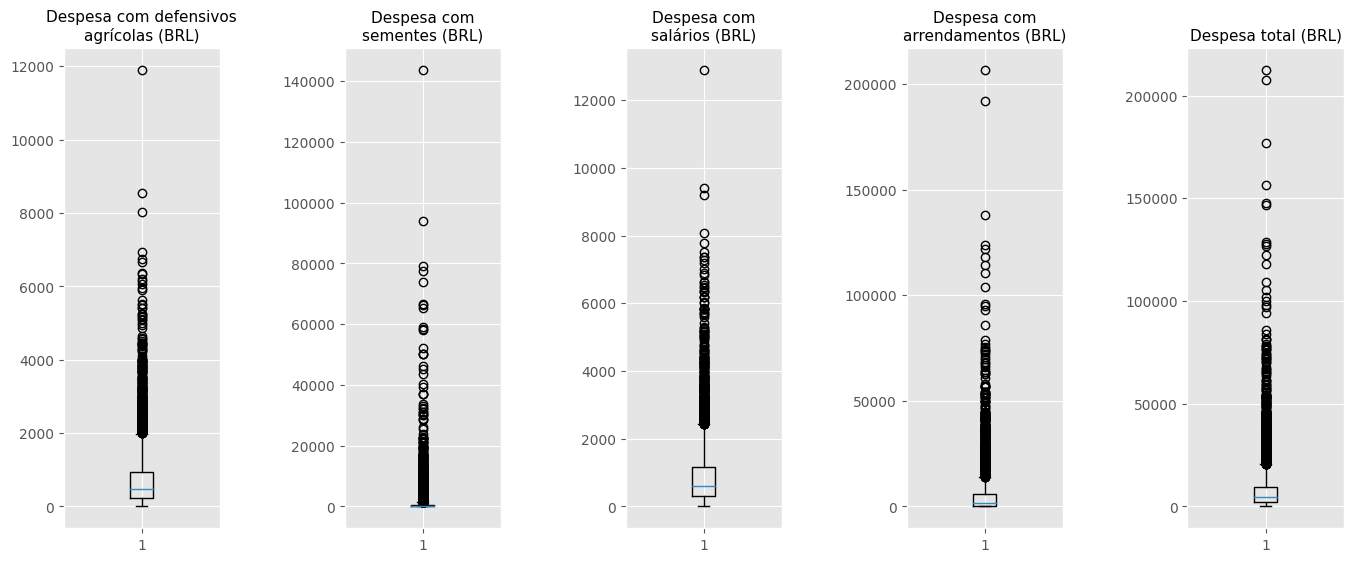

In [16]:
features_despesa = ['despesa_defensivos', 'despesa_sementes', 'despesa_salarios',
                    'despesa_arrendamentos', 'despesa_total']

title_plots_despesa = ['Despesa com defensivos\nagrícolas (BRL)', 'Despesa com\nsementes (BRL)', 
                       'Despesa com\nsalários (BRL)', 'Despesa com\narrendamentos (BRL)', 
                       'Despesa total (BRL)']

adjust_plots = [.5, 2.5, 1., 2., .3, .8]

multiple_boxplot(df_agro, features_despesa, 5, title_plots_despesa, 11, adjust_plots)

Os boxplots nos mostram um grande volume de anomalias em todas as features de despesas. Entretanto é importante ter em mente que o Censo Agropecuário é muito diversificado, temos dados desde pequenas propriedades de agricultura familiar até grandes produtores agrícolas. Assim, é compreensível que haja valores tão destoantes.

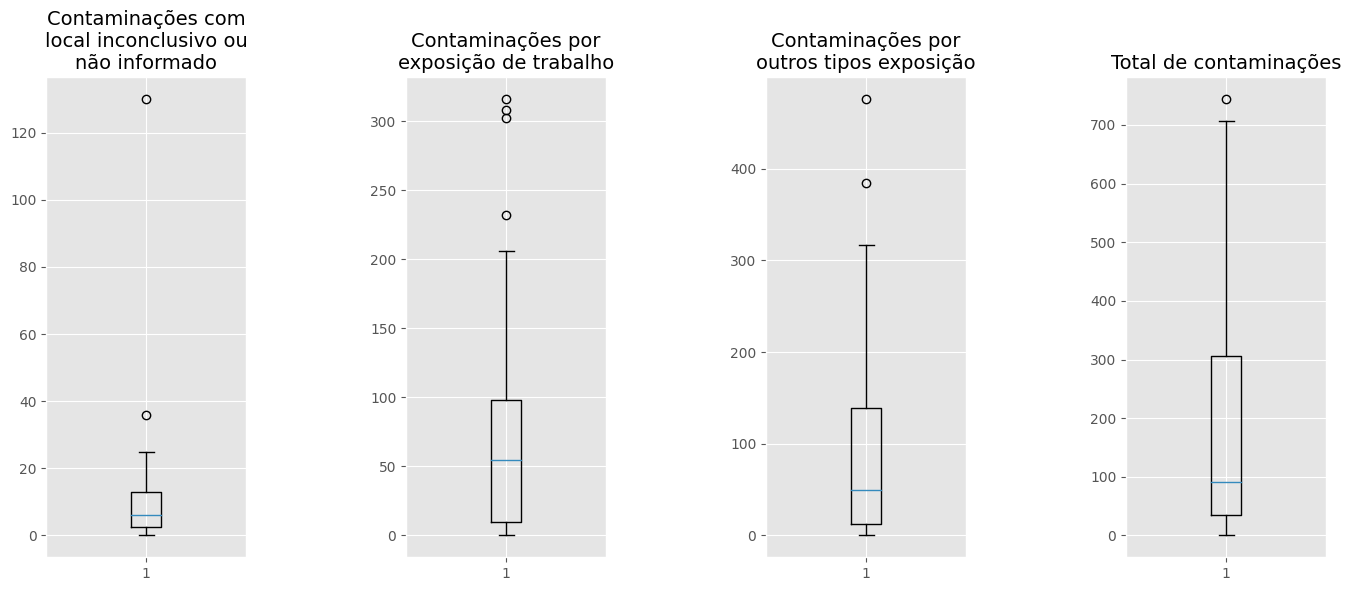

In [17]:
features_intoxic = ['Ign/Branco', 'intoxic_trabalho', 'intoxic_outros', 'total_intoxic']

title_plots_intoxic = ['Contaminações com\nlocal inconclusivo ou\nnão informado',
                       'Contaminações por\nexposição de trabalho', 
                       'Contaminações por\noutros tipos exposição',
                       'Total de contaminações']

multiple_boxplot(df_intoxic, features_intoxic, 4, title_plots_intoxic, 14, adjust_plots);

Considerando a diferença de magnitude entre os datasets, aqui observamos uma pequena quantidade de outliers. Além disso, as medianas das contaminações relacionadas ao trabalho e as contaminações por demais motivos então muito próximas (cerca de 50 casos), também há uma alta variabilidade nos dados que pode ser percebida através da amplitude dos valores máximos e mínimos das caixas.

## **Análise Exploratória de Dados**

Cruzamento das bases. Padronizar as features referentes aos estados será muito útil para que possamos unir os datasets. Além disso, realizaremos um agrupamento dos dados pela UF.

In [18]:
df_agro = df_agro.groupby('sigla_uf', as_index=False).sum()
df_agro = df_agro.merge(df_intoxic, on='sigla_uf', how='outer')
df_agro

,sigla_uf,despesa_defensivos,despesa_total,despesa_sementes,despesa_arrendamentos,despesa_salarios,despesa_cotas,valor_producao_total,valor_total_producao_vegetal,valor_producao_total_animal,Ign/Branco,intoxic_trabalho,intoxic_outros,total_intoxic
0,AC,29554.0,107475.0,2329.0,38160.0,37356.0,76.0,2781.0,16.0,1222.0,1.0,10.0,9.0,20.0
1,AL,76378.0,517778.0,160810.0,179671.0,98341.0,2578.0,6673.0,4.0,13862.0,8.0,55.0,54.0,117.0
2,AM,62090.0,215990.0,8085.0,64445.0,80959.0,411.0,675.0,0.0,517.0,1.0,9.0,9.0,19.0
3,AP,4980.0,73912.0,58961.0,1444.0,8507.0,20.0,277.0,0.0,108.0,0.0,0.0,0.0,0.0
4,BA,673111.0,2783045.0,406991.0,935606.0,762757.0,4580.0,667.0,795091.0,122917.0,14.0,77.0,86.0,177.0
5,CE,256875.0,1502122.0,222974.0,606761.0,394330.0,21182.0,16450.0,452.0,70334.0,12.0,23.0,97.0,132.0
6,DF,3206.0,54383.0,25626.0,19933.0,5246.0,372.0,6.0,0.0,34215.0,7.0,56.0,7.0,70.0
7,ES,85286.0,960180.0,364470.0,400431.0,108014.0,1979.0,274.0,0.0,9103.0,20.0,206.0,203.0,429.0
8,GO,124490.0,3436495.0,524592.0,2628274.0,151710.0,7429.0,86901.0,1737319.0,300755.0,25.0,119.0,150.0,294.0
9,MA,139094.0,614643.0,57142.0,188370.0,219628.0,10409.0,135323.0,0.0,17814.0,3.0,9.0,15.0,27.0


Estatísticas básicas dos Datasets.

In [19]:
df_agro.describe()

,despesa_defensivos,despesa_total,despesa_sementes,despesa_arrendamentos,despesa_salarios,despesa_cotas,valor_producao_total,valor_total_producao_vegetal,valor_producao_total_animal,Ign/Branco,intoxic_trabalho,intoxic_outros,total_intoxic
count,27.000000,2.700000e+01,2.700000e+01,2.700000e+01,27.000000,27.000000,2.700000e+01,2.700000e+01,27.000000,27.000000,27.000000,27.000000,27.000000
mean,151573.481481,1.709262e+06,2.541801e+05,1.109811e+06,187771.407407,5925.037037,4.040218e+05,4.201337e+05,119823.666667,12.925926,82.925926,102.037037,197.888889
std,155577.287171,2.362553e+06,3.701689e+05,1.853777e+06,180184.365921,7081.226331,1.596563e+06,1.269983e+06,217832.357582,24.913583,100.851348,127.533550,227.124218
min,3206.000000,5.438300e+04,2.329000e+03,1.444000e+03,5246.000000,20.000000,6.000000e+00,0.000000e+00,108.000000,0.000000,0.000000,0.000000,0.000000
25%,50729.500000,4.874125e+05,5.198550e+04,1.840205e+05,68190.500000,1169.000000,1.521000e+03,0.000000e+00,8502.000000,2.500000,9.500000,12.000000,35.000000
50%,100601.000000,6.800910e+05,1.091870e+05,4.240920e+05,118569.000000,3038.000000,2.653000e+04,1.300000e+01,17814.000000,6.000000,55.000000,50.000000,92.000000
75%,200419.000000,2.142584e+06,2.088090e+05,9.177930e+05,263489.000000,6839.000000,8.377200e+04,1.160600e+04,93737.500000,13.000000,98.000000,139.000000,306.500000
max,673111.000000,1.101837e+07,1.353472e+06,8.695349e+06,762757.000000,24182.000000,8.326973e+06,6.207274e+06,891607.000000,130.000000,316.000000,476.000000,744.000000


A partir dessas estatísticas podemos observar que o desvio padrão de todas as features é muito elevado, o que indica uma grande heterogeneidade da amostra. O que é compreensível conhecendo a natureza de nossos dados.

### **Função de Plotagem de Gráficos de Barras Ordenados por Estado (UF)**

**Sintaxe:** plot_barchart(x, y, dataframe, figsize, ascending, sortColumn, palette, xlabel, ylabel, title)

Esta função aceita os argumentos a seguir.

**x:** coluna do dataframe que corresponderá ao eixo x. Deve estar no formato: <dataframe.column>.

**y:** coluna do dataframe que corresponderá ao eixo y. Deve estar no formato: <dataframe.column>.

**dataframe:** o dataframe do pandas com os dados a serem plotados. 

**figsize:** uma tupla contendo dois valores inteiros que correspondem as dimensões do gráfico.

**ascending:** valor booleano que indica se as barras devem ser ordenadas de maneiras crescente (True) ou decescente (False).

**Sortcolumn:** nome da coluna que será ordenada por UF, deve ser do tipo string.

**palette:** nome da paleta de cores a ser utilizada no gráfico. Caso queira usar a paleta padrão do seaborn passe None para esse argumento, do contrário deve ser uma string.

**xlabel:** descrição do eixo x. Deve ser uma string.

**ylabel:** descrição do eixo y. Deve ser uma string.

**title:** título do gráfico. Deve ser uma string.

**Quais relações entre as features podemos inferir a partir das estimativa de suas funções densidade de probabilidade?**

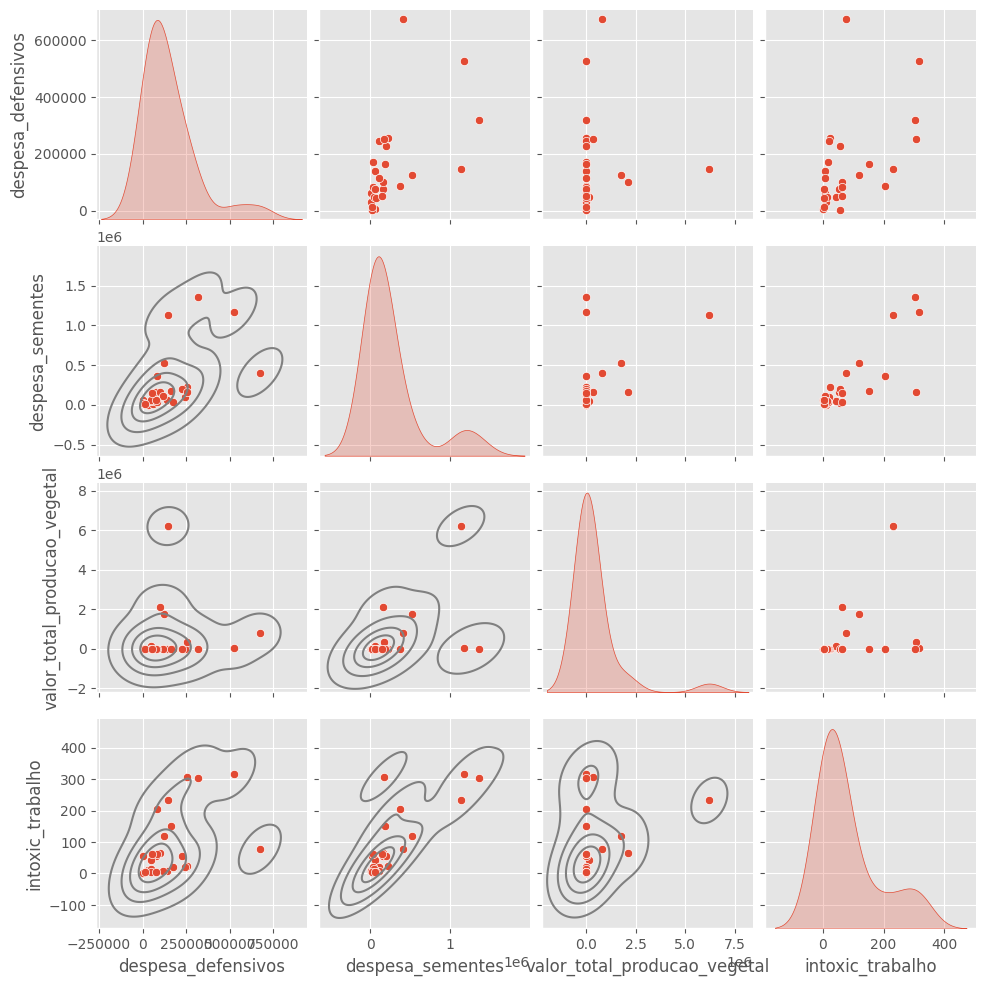

In [29]:
filtro = ['despesa_defensivos', 'despesa_sementes', 
          'valor_total_producao_vegetal', 'intoxic_trabalho']

fig = sns.pairplot(df_agro[filtro], diag_kind="kde")
fig.map_lower(sns.kdeplot, levels=5, color=".5")

plt.show();

As quatro features analisadas passuem distribuições bimodais do tipo U, ou seja, elas apresentam picos em ambas as estramidades, cujos picos pincipais (maiores) estão a esquerda. Outro ponto a considerar é a alta dispersão dos dados indicando baixa correlação linear. Isso não descarta a possibilidade de estarem correlacionadas de maneira não-linear.

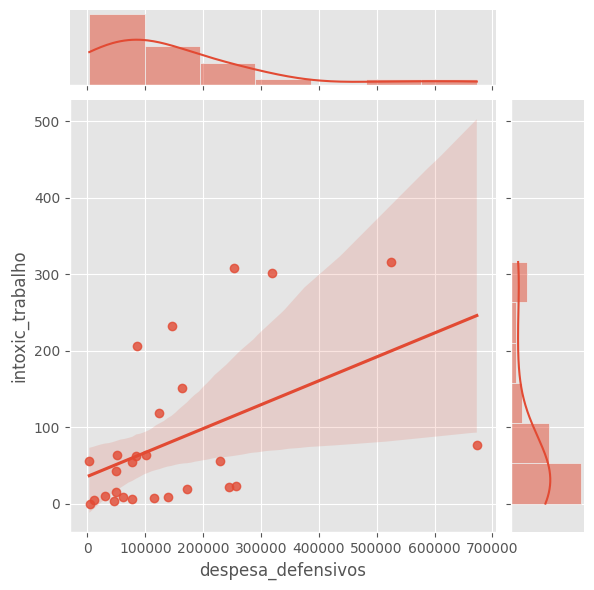

In [54]:
sns.jointplot('despesa_defensivos', 'intoxic_trabalho',
              data=df_agro, kind='reg')

plt.show();

Ao observar individualmente o número de intoxicações e o valor das despesas com defensivos agrícolas notamos que ambos apresentam uma distorção para a esquerda. Isso indica que a maioria dos estados tem quantidade baixa de intoxicações realcionadas ao trabalho e valores baixos de despesas com defensivos. Entretanto, temos um estado com gastos muito elavados com agrotóxicos e ainda assim um número pequeno de intoxicações.

In [20]:
def plot_barchart(x, y, dataframe, figsize, ascending, 
                  sortColumn, palette, xlabel, ylabel, title):
    
    fig = plt.figure(figsize = figsize)
    ax = sns.barplot(x=x, y=y, data=dataframe, palette=palette, 
                    order=dataframe.sort_values(sortColumn, ascending=ascending).sigla_uf)

    ax.set_xlabel(xlabel, size=14)
    ax.set_ylabel(ylabel, size=14)
    ax.set_title(title, size=18)

    plt.show();

**Quais os 3 estados com maiores despesas com defensivos agrícolas?**

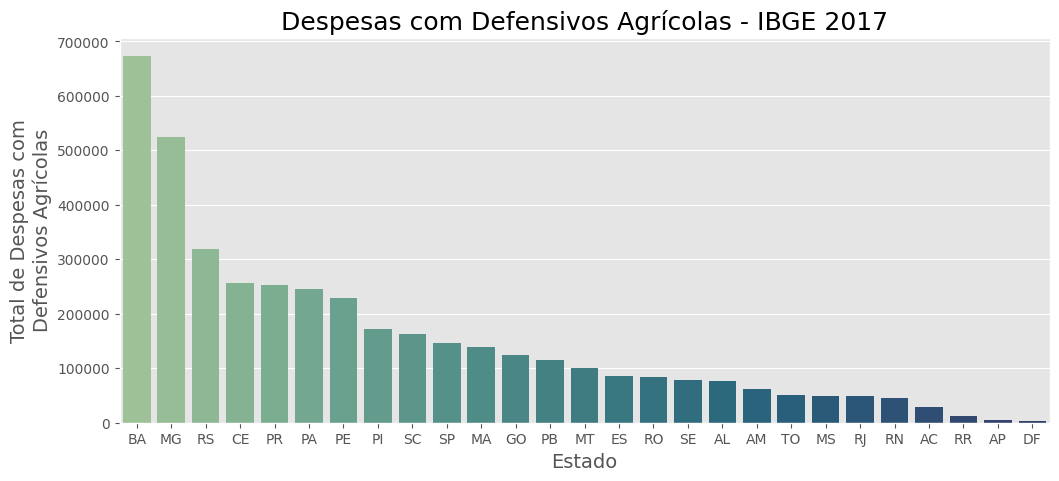

In [21]:
plot_barchart(df_agro.sigla_uf, df_agro.despesa_defensivos, df_agro, 
              (12, 5), False, 'despesa_defensivos', 'crest', 'Estado',
              'Total de Despesas com\nDefensivos Agrícolas', 
              'Despesas com Defensivos Agrícolas - IBGE 2017');

O estado da Bahia lidera o ranking dos gastos com agrotóxicos, seguido de Minas Gerais e Rio Grande do Sul(com quase metade do valor das despesas da Bahia. Vale destacar que o Destrito Federal e o Amapá tem as manores despesas com defensivos agrícolas de todo o país.

**Quais os 3 estados com maior número de intoxicações por defensivos agrícolas relacionadas ao trabalho?**

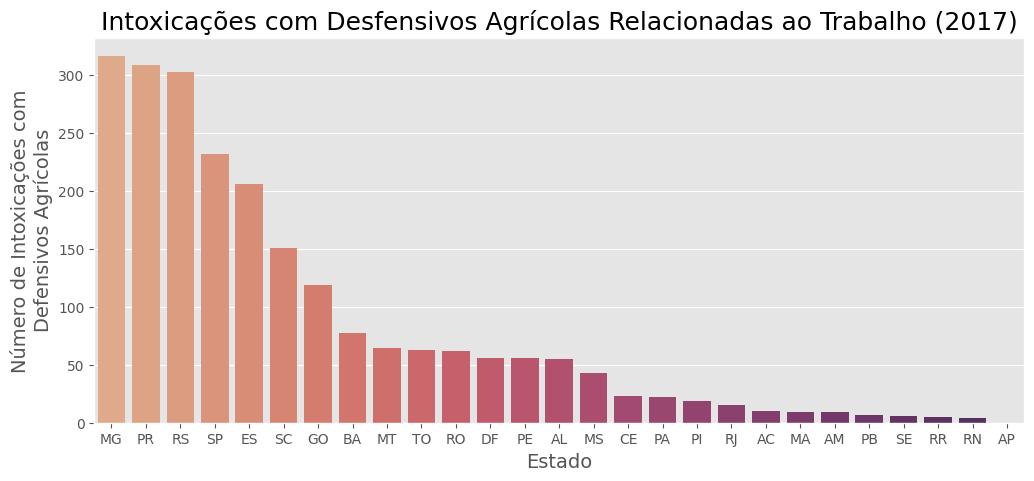

In [22]:
plot_barchart(df_agro.sigla_uf, df_agro.intoxic_trabalho, df_agro, 
              (12, 5), False, 'intoxic_trabalho', 'flare', 'Estado',
              'Número de Intoxicações com\nDefensivos Agrícolas', 
              'Intoxicações com Desfensivos Agrícolas Relacionadas ao Trabalho (2017)');

Podemos observar um resultado similar ao do ranking anterior, Minas Gerais e Rio Grande do Sul aparecem novamente. Porém, em relação as intoxicações eles ocupam o primeiro e terceiro lugar, respectivamente. Com o segundo lugar sendo ocupado pelo Paraná. As três primeiras posições têm número de casos muito similares. Podemos inferir ainda uma possível relação entre as despesas com defensivos e intoxicações de trabalho por eles, porém precisaríamos de outras informações.

**Qual o impacto das despesas com defensivos nas despesas agrícolas totais dos estados da BA, MG e RS?**

In [24]:
def plot_donut(dataframe, figsize, title, startangle):
    
    fig = plt.figure(figsize=figsize, dpi=1600)
    
    plt.pie(dataframe, radius=1,
            colors=['xkcd:purple', 'xkcd:white', 'xkcd:white'],
            labels=['BA', '', ''], pctdistance=0.85, shadow=False,
            labeldistance=.7, wedgeprops=dict(width=0.3, edgecolor='white'))

    plt.pie(dataframe, radius=0.8,
            colors=['xkcd:white', 'xkcd:magenta', 'xkcd:white'],
            labels=['', 'MG', ''],wedgeprops=dict(width=0.3, edgecolor='white'),
            pctdistance=.8, labeldistance=0.8, shadow=False, startangle = startangle[0])

    plt.pie(dataframe, radius=0.6,
            colors=['xkcd:white', 'xkcd:white', 'xkcd:orange'],
            labels=['', '', 'RS'],wedgeprops=dict(width=0.3, edgecolor='white'),
            pctdistance=.8, labeldistance=0.6, shadow=False, startangle = startangle[1])

    plt.axis('equal')
    plt.title(title)
    plt.show()

In [25]:
values=['BA','RS', 'MG']
filtro_despesas = ['sigla_uf', 'despesa_defensivos', 'despesa_sementes',
          'despesa_arrendamentos', 'despesa_salarios', 'despesa_cotas']

filtered_df = df_agro[df_agro.sigla_uf.isin(values)]
filtered_df

,sigla_uf,despesa_defensivos,despesa_total,despesa_sementes,despesa_arrendamentos,despesa_salarios,despesa_cotas,valor_producao_total,valor_total_producao_vegetal,valor_producao_total_animal,Ign/Branco,intoxic_trabalho,intoxic_outros,total_intoxic
4,BA,673111.0,2783045.0,406991.0,935606.0,762757.0,4580.0,667.0,795091.0,122917.0,14.0,77.0,86.0,177.0
10,MG,525310.0,11018367.0,1165992.0,8695349.0,607534.0,24182.0,4828.0,20511.0,433080.0,20.0,316.0,290.0,626.0
22,RS,319224.0,5974914.0,1353472.0,3920344.0,364875.0,16999.0,8326973.0,37.0,76534.0,12.0,302.0,128.0,442.0


In [296]:
startangle = [200, 75]

plot_donut(filtered_df.despesa_defensivos, (18, 10), 
           'Despesas com Defensivos Agrícolas', startangle)

Na Bahia, as despesas com agrotóxicos correspondem a cerca de 24,19% de todas as despesas agrícolas. Um percentual bem elevado. Minas Gerais e Rio Grande do Sul tem percentuais bem menores em relação as suas despesas agrícolas totais. A Bahia parece apresentar valores bem atípicos comparados ao restante do país.

**Qual o estado tem a maior produção vegetal em reais?**

In [26]:
estados_uf = {
    'AC': 'BR.AC', 'AL': 'BR.AL', 'AP': 'BR.AP',
    'AM': 'BR.AM', 'BA': 'BR.BA', 'CE': 'BR.CE',
    'DF': 'BR.DF', 'ES': 'BR.ES', 'GO': 'BR.GO', 
    'MA': 'BR.MA', 'MT': 'BR.MT', 'MS': 'BR.MS', 
    'MG': 'BR.MG', 'PA': 'BR.PA', 'PB': 'BR.PB', 
    'PR': 'BR.PR', 'PE': 'BR.PE', 'PI': 'BR.PI', 
    'RJ': 'BR.RJ', 'RN': 'BR.RN', 'RS': 'BR.RS',
    'RO': 'BR.RO', 'RR': 'BR.RR', 'SC': 'BR.SC',
    'SP': 'BR.SP', 'SE': 'BR.SE', 'TO': 'BR.TO',
}

In [27]:
def plot_map(dataframe, column, title):
    
    dataframe.sigla_uf = dataframe.sigla_uf.apply(lambda x: estados_uf[x])
    dataframe = dataframe.rename(columns={'sigla_uf': 'HASC_1'})

    fig, ax = plt.subplots(1, 1)
    br_map = gpd.read_file('C:\Projetos\env\gadm36_BRA_1.shp')
    br_map = br_map.merge(dataframe, on='HASC_1', how='outer')
    br_map.plot(column=column, ax=ax)
    plt.title(title)

    plt.show();

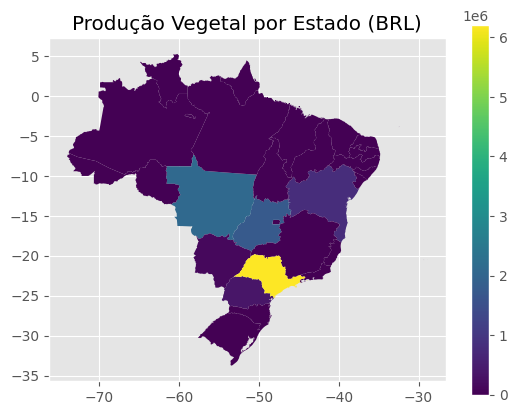

In [28]:
plot_map(df_agro, 'valor_total_producao_vegetal', 'Produção Vegetal por Estado (BRL)')

Quando o assunto é o valor obtido com a produção vegetal o destaque é do estado de São Paulo com quase o triplo do valor em reais do segundo maior valor de produção, ocupado pelo Mato Grosso.

## **Considerações**

Analisando os dados do Censo Agropecuário de 2017, realizado pelo IBGE, pudemos identicicar os três estados com maiores despesas com agrotóxicos/defensivos agrícolas e, fazendo o cruzamento com a base do DATASUS, que dois deles também são os estados com maior números de intoxicações por agrotóxicos relacionadas ao trabalho. O que pode indicar algum tipo de correlação, porém é preciso realizar novos cruzamentos com bases como a do IBAMA e considerar variáveis como liberação de novos agrotóxicos no mercado e crescimento da produção agrícola. Para trabalhos futuros pretendo analisar também o Censo Agropecuário de 2006 buscando estabelecer novas relações e fazer comparações.

## **Instalação do pacote geopandas no *Windows***

Se você usa um SO Windows e está tentando usar os pacotes geopandas ou basedosdados, provavelmente se deparou com um erro durante a instalação. Esse erro ocorre principalmente devido a existência de extensões C que acabam gerando falhas durante a compilação do pip (vide instalação do geopandas).

Primeiro, recomendo que baixe e instale o Microsoft C++ Build Tool, isso já irá resolver o problema da lib basedosdados e pode ser necessário para alguma das dependências (wheels) do geopandas. Você terá que baixar 5 wheels através do Gohlke: GDAL, Fiona, pyproj, rtree, e shapely. Os downloads podem ser realizados através dos links:

C++ Tools: https://visualstudio.microsoft.com/pt-br/visual-cpp-build-tools/

GDAL: https://www.lfd.uci.edu/~gohlke/pythonlibs/#gdal
     
Fiona: https://www.lfd.uci.edu/~gohlke/pythonlibs/#fiona
    
Pyproj: https://www.lfd.uci.edu/~gohlke/pythonlibs/#pyproj
   
Rtree: https://www.lfd.uci.edu/~gohlke/pythonlibs/#rtree
    
Shapely: https://www.lfd.uci.edu/~gohlke/pythonlibs/#shapely
  
Após acessar os links você deve estar se perguntando como saber quais arquivos baixar. O comando a seguir fornece a lista de tags que você pode usar. Baixe as wheels que tenham alguma das tags listadas em "compatible tags".

In [ ]:
pip debug --verbose

Após o download de todas as wheels, você pode instalá-las manualmente pelo prompt ou no própio notebook como a seguir:

In [ ]:
!pip install GDAL-3.4.3-cp39-cp39-win_amd64.whl
!pip install Fiona-1.8.21-cp39-cp39-win_amd64.whl
!pip install pyproj-3.3.1-cp39-cp39-win_amd64.whl
!pip install Rtree-1.0.0-cp39-cp39-win_amd64.whl
!pip install Shapely-1.8.2-cp39-cp39-win_amd64.whl

Pronto! Agora basta usar o pip para instalar o geopandas e ser feliz! Espero que você veja esta solução antes de tentar uma infinidade de outras sem sucesso, para que não perca tanto tempo quanto eu haha.

In [ ]:
!pip install geopandas